In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Datasets as D, Utilities as U, Parsers as P
import matplotlib.pyplot as plt
import numpy as np

In [3]:
omp = 1
mpi_run = 'mpirun -np 16'

In [4]:
code = C.YamboCalculator(omp=omp,mpi_run=mpi_run,executable='yambo',skip=True,verbose=True)
#code.global_options()

Initialize a parallel Yambo calculator with scheduler direct


# Computation of the IP Absorption spectrum

We compute the IP absorption spectrum using Yambo

In [5]:
#source_dir = 'NSCF/bnds_16-kpoints_20.save'
#run_dir = 'ABS_k20'

#source_dir = 'NSCF/bnds_16-kpoints_100-sampling_random_close_Gamma.save'
#run_dir = 'ABS_k100-random'

source_dir = 'NSCF/bnds_16-kpoints_8.save'
run_dir = 'ABS_k8'

In [6]:
#U.build_SAVE(source_dir,run_dir,command='p2y -nosym',make_link=True)
U.build_SAVE(source_dir,run_dir,make_link=True)

Create folder ABS_k8
Executing command: cd NSCF/bnds_16-kpoints_8.save; p2y -a 2
Create a symlink of /home/marco/Data/RICERCA/DFT AND MANY BODY/OPTICAL ORIENTATION/Generation and decay of the degree of spin polarization in GaAs/NSCF/bnds_16-kpoints_8.save/SAVE in ABS_k8
Executing command: cd ABS_k8;OMP_NUM_THREADS=1 yambo


In [53]:
inp = I.YamboInput('yambo -o c',folder=run_dir)
inp['variables']['LongDrXd'] = [[1.00,1.00,1.00],''] # electric field
inp['variables']['XfnQP_E'] = [[0.5456,1.00,1.00],''] # scissor
inp['variables']['DmRngeXd'] = [[0.15,0.15],'eV'] # damping range
inp['variables']['EnRngeXd'] = [[0,8],'eV'] # energy range
inp['variables']['BndsRnXd'] = [[5,10],''] # bands used for transitions
inp['variables']['QpntsRXd'] = [[1,1],''] # momentum transfer
inp

{'args': 'yambo -o c',
 'folder': 'ABS_k8',
 'filename': 'yambo.in',
 'arguments': ['chi', 'optics'],
 'variables': {'DIP_Threads': [0.0, ''],
  'X_Threads': [0.0, ''],
  'ETStpsXd': [100.0, ''],
  'Chimod': 'IP',
  'QpntsRXd': [[1, 1], ''],
  'BndsRnXd': [[5, 10], ''],
  'EnRngeXd': [[0, 8], 'eV'],
  'DmRngeXd': [[0.15, 0.15], 'eV'],
  'LongDrXd': [[1.0, 1.0, 1.0], ''],
  'XfnQP_E': [[0.5456, 1.0, 1.0], '']}}

In [55]:
name = 'ip_abs'
#name = 'hartree_abs'
result = code.run(inputs=[inp],names=[name],run_dir=run_dir,skip=False)
result

delete folder: ABS_k8/ip_abs
Executing command: cd ABS_k8; mpirun -np 16 yambo -F ip_abs.in -J ip_abs -C ip_abs
run0_is_running:True  
run0_is_running:True  
Job completed


{'output': [['ABS_k8/ip_abs/o-ip_abs.eel_q1_ip',
   'ABS_k8/ip_abs/o-ip_abs.eps_q1_ip']],
 'dbs': ['ABS_k8/ip_abs']}

In [56]:
data = P.YamboParser(result['output'][0])

In [57]:
eps = data['eps_q1_ip']
energy = eps['col0']
eps_im = eps['col1']
eps_re = eps['col2']

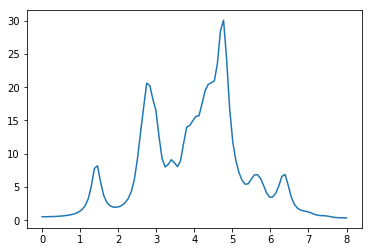

In [58]:
plt.plot(energy,eps_im)

We can compare the height of this peak with the corresponding one of the absorption spectrum computed
on the whole BZ. To do so (using the same value of eta!!!) we have to normalize the peak with the ratio
of the volume of the Kpump region w.r.t the one of full BZ.

In units of 2pi/alat the volume of the BZ is 1/4. The one of the kpump is (0.05)^3

In [76]:
4*0.05**3

0.0005000000000000001

In [77]:
2500*0.0005

1.25

The _true_ height of the peak is 1.25 and matches with the value obtained in the full BZ 

In [79]:
data_20 = P.YamboParser.from_path('ABS_k20/ip_abs')

In [80]:
eps = data_20['eps_q1_ip']
energy = eps['col0']
eps_im = eps['col1']
eps_re = eps['col2']

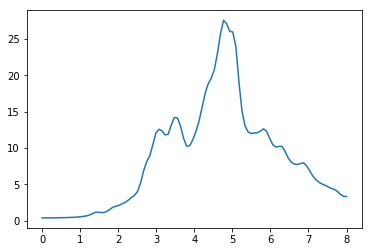

In [83]:
plt.plot(energy,eps_im)
#plt.xlim(0,2)
#plt.ylim(0,5)

## IP vs Hartree or ALDA

In [84]:
inp = I.YamboInput('yambo -o c -k Hartree',folder=run_dir)
inp['variables']['LongDrXd'] = [[1.00,1.00,1.00],''] # electric field
inp['variables']['XfnQP_E'] = [[0.5456,1.00,1.00],''] # scissor
inp['variables']['DmRngeXd'] = [[0.15,0.15],'eV'] # damping range
inp['variables']['EnRngeXd'] = [[0,8],'eV'] # energy range
inp['variables']['BndsRnXd'] = [[5,10],''] # bands used for transitions
inp['variables']['QpntsRXd'] = [[1,1],''] # momentum transfer
inp['variables']['NGsBlkXd'] = [3.0,'Ha'] #  Number of G-vectors or energy cut off in the screening (response block size)
inp

{'args': 'yambo -o c -k Hartree',
 'folder': 'ABS_k8',
 'filename': 'yambo.in',
 'arguments': ['chi', 'optics'],
 'variables': {'DIP_Threads': [0.0, ''],
  'X_Threads': [0.0, ''],
  'NGsBlkXd': [3.0, 'Ha'],
  'ETStpsXd': [100.0, ''],
  'Chimod': 'HARTREE',
  'QpntsRXd': [[1, 1], ''],
  'BndsRnXd': [[5, 10], ''],
  'EnRngeXd': [[0, 8], 'eV'],
  'DmRngeXd': [[0.15, 0.15], 'eV'],
  'LongDrXd': [[1.0, 1.0, 1.0], ''],
  'XfnQP_E': [[0.5456, 1.0, 1.0], '']}}

In [85]:
name = 'hartree_abs'
result = code.run(inputs=[inp],names=[name],run_dir=run_dir,skip=False)
result

delete folder: ABS_k8/hartree_abs
Executing command: cd ABS_k8; mpirun -np 16 yambo -F hartree_abs.in -J hartree_abs -C hartree_abs
run0_is_running:True  
run0_is_running:True  
run0_is_running:True  
Job completed


{'output': [['ABS_k8/hartree_abs/o-hartree_abs.eps_q1_inv_rpa_dyson',
   'ABS_k8/hartree_abs/o-hartree_abs.eel_q1_inv_rpa_dyson']],
 'dbs': ['ABS_k8/hartree_abs']}

In [86]:
data = P.YamboParser(result['output'][0])

In [87]:
eps_hartree = data['eps_q1_inv_rpa_dyson']
energy_hartree = eps['col0']
eps_im_hartree = eps['col1']
eps_re_hartree = eps['col2']

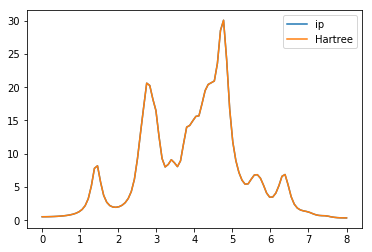

In [88]:
plt.plot(energy,eps_im,label='ip')
plt.plot(energy_hartree,eps_im_hartree,label='Hartree')
plt.legend()

In [73]:
inp = I.YamboInput('yambo -o c -k alda',folder=run_dir)
inp['variables']['LongDrXd'] = [[1.00,1.00,1.00],''] # electric field
inp['variables']['XfnQP_E'] = [[0.5456,1.00,1.00],''] # scissor
inp['variables']['DmRngeXd'] = [[0.15,0.15],'eV'] # damping range
inp['variables']['EnRngeXd'] = [[0,8],'eV'] # energy range
inp['variables']['BndsRnXd'] = [[5,10],''] # bands used for transitions
inp['variables']['QpntsRXd'] = [[1,1],''] # momentum transfer
inp

{'args': 'yambo -o c -k alda',
 'folder': 'ABS_k8',
 'filename': 'yambo.in',
 'arguments': ['chi', 'optics'],
 'variables': {'X_Threads': [0.0, ''],
  'DIP_Threads': [0.0, ''],
  'FxcGRLc': [1.0, 'RL'],
  'NGsBlkXd': [1.0, 'RL'],
  'ETStpsXd': [100.0, ''],
  'Chimod': 'ALDA',
  'QpntsRXd': [[1, 1], ''],
  'BndsRnXd': [[5, 10], ''],
  'EnRngeXd': [[0, 8], 'eV'],
  'DmRngeXd': [[0.15, 0.15], 'eV'],
  'LongDrXd': [[1.0, 1.0, 1.0], ''],
  'XfnQP_E': [[0.5456, 1.0, 1.0], '']}}

In [77]:
name = 'alda_abs'
result = code.run(inputs=[inp],names=[name],run_dir=run_dir,skip=False)
result

Executing command: cd ABS_k8; mpirun -np 16 yambo -F alda_abs.in -J alda_abs -C alda_abs
run0_is_running:True  
Job completed


{'output': [[]], 'dbs': ['ABS_k8/alda_abs']}

In [75]:
data = P.YamboParser(result['output'][0])

In [76]:
eps_alda = data['eps_q1_inv_rpa_dyson']
energy_alda = eps['col0']
eps_im_alda = eps['col1']
eps_re_alda = eps['col2']

KeyError: 'eps_q1_inv_rpa_dyson'

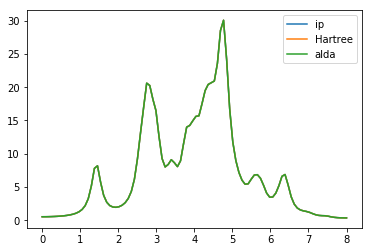

In [71]:
plt.plot(energy,eps_im,label='ip')
plt.plot(energy_hartree,eps_im_hartree,label='Hartree')
plt.plot(energy_alda,eps_im_alda,label='alda')
plt.legend()

In [ ]:
##########################################################################################à

In [38]:
file_ip = 'ABS_k8/ip_abs/o-ip_abs.eps_q1_ip'
file_hartree = 'ABS_k8/hartree_abs/o-hartree_abs.eps_q1_inv_rpa_dyson'

In [45]:
data_ip = P.YamboParser([file_ip])['eps_q1_ip']
data_hartree = P.YamboParser([file_hartree])['eps_q1_inv_rpa_dyson']

In [49]:
eng_ip = data_ip['col0']
eps_ip = data_ip['col1']
eng_hartree = data_hartree['col0']
eps_hartree = data_hartree['col1']

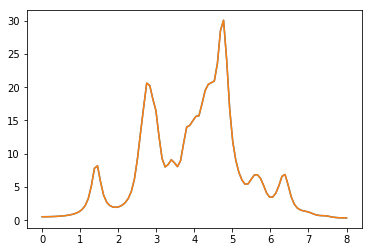

In [50]:
plt.plot(eng_ip,eps_ip)
plt.plot(eng_hartree,eps_hartree)